In [42]:
%pip install opencv-python matplotlib

import cv2
import numpy as numpy
import matplotlib.pyplot as plt



Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [43]:
def read_file(filename):
    img = cv2.imread(filename)
    img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
    plt.imshow(img)

    plt.show()
    return img

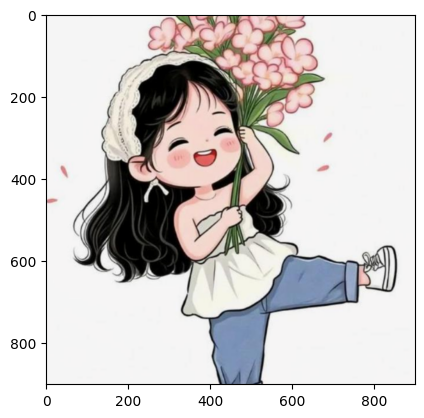

array([[[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       ...,

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]]

In [57]:
import cv2

filenamee = "port.png"

read_file(filenamee)


#create Edge Mask

In [55]:
def edge_mask(img,line_size,blur_value):
    
    
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    gray_blur = cv2.medianBlur(gray,blur_value)

    edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C,
    cv2.THRESH_BINARY, line_size, blur_value )
    return edges

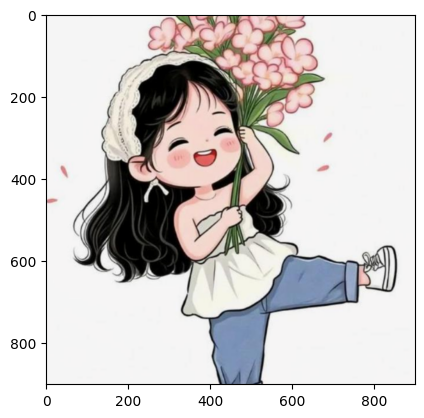

In [58]:
line_size, blur_value = 7, 7
img = read_file(filenamee)
edges=edge_mask(img, line_size, blur_value)

In [56]:
line_size,blur_value =5,7
edges = edge_mask(img , line_size, blur_value)

plt.imshow(edges, cmap="binary")
plt.show()

In [48]:
def color_quantizattion(img , k):
    data = np.float32(img).reshape((-1,3))
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TermCriteria_MAX_ITER,20,0.001)

    ret , label , center = cv2.kmeans(data,k,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)
    center = np.unit8(center)

    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

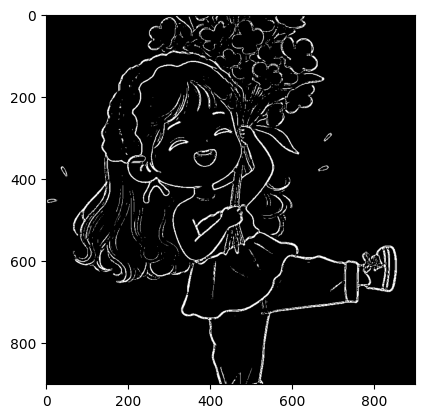

In [49]:



img = color_quantization(img, k=2)

plt.imshow(edges, cmap ="binary")
plt.show()


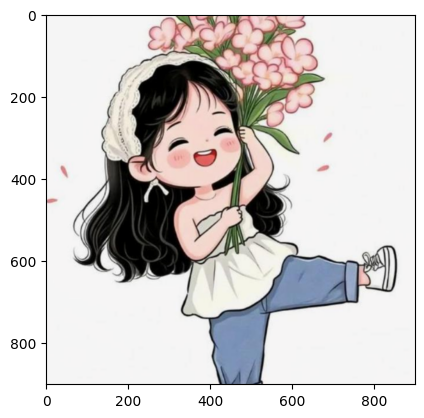

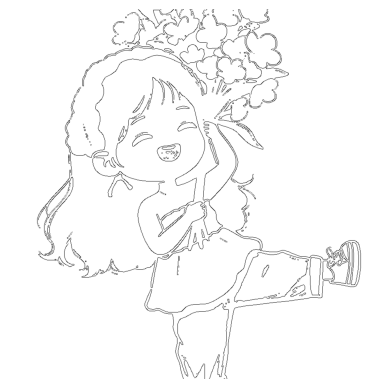

In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def color_quantization(img, k):
    data = img.reshape((-1, 3))
    data = np.float32(data)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    ret, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

# Load image using existing filenamee and read_file function
img = read_file(filenamee)

# Apply color quantization
img = color_quantization(img, k=2)

# Detect edges
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
edges = cv2.Canny(gray, 100, 200)

# Show result
plt.imshow(edges, cmap="binary")
plt.axis('off')
plt.show()


In [51]:
def cartoon(blurred):
    c = cv2.bitwise_add(blurred, blurred , mask=edges)
    

In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def color_quantization(img, k):
    data = img.reshape((-1, 3))
    data = np.float32(data)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
    _, label, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    result = center[label.flatten()]
    result = result.reshape(img.shape)
    return result

def cartoonify(img):
    # Step 1: Use the provided image
    # img is already in RGB format

    # Step 2: Reduce noise
    blurred = cv2.bilateralFilter(img, d=9, sigmaColor=75, sigmaSpace=75)

    # Step 3: Edge detection
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    edges = cv2.adaptiveThreshold(cv2.medianBlur(gray, 7), 255,
                                  cv2.ADAPTIVE_THRESH_MEAN_C,
                                  cv2.THRESH_BINARY, blockSize=9, C=2)

    # Step 4: Color quantization
    quantized = color_quantization(blurred, k=9)

    # Step 5: Combine edges with color image
    cartoon = cv2.bitwise_and(quantized, quantized, mask=edges)

    # Display result
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Original")
    plt.imshow(img)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Cartoon Effect")
    plt.imshow(cartoon)
    plt.axis('off')
    plt.show()

# Call the function
# Call the function using the already loaded image
cartoonify(img)
